## Armenia Economic Opportunity
Data sources: 
1. [Armenia - Global Financial Inclusion (Global Findex) Database 2011](https://microdata.worldbank.org/index.php/catalog/1123) 
2. [Armenia - Global Financial Inclusion (Global Findex) Database 2021](https://microdata.worldbank.org/index.php/catalog/4612) 

Data description: 
1. [Dictionary: Armenia - Global Financial Inclusion (Global Findex) Database 2011](https://microdata.worldbank.org/index.php/catalog/1123/data-dictionary) 
2. [Dictionary: Armenia - Global Financial Inclusion (Global Findex) Database 2021](https://microdata.worldbank.org/index.php/catalog/4612/data-dictionary/F1?file_name=micro_arm.dta) 

The initial plan was to analyze existing research on financial inclusion in the Republic of Armenia, as well as dect any trends in the inclusion dynamics in the period from 2011 to 2021. Further, the research could be augmented by correlated macroeconomic and socioeconomic indicators in order to validate the underlying trends. 



In [13]:
import pandas as pd
import seaborn as sns
import xlrd

### Import 2021 data

In [14]:
arm21 = pd.read_csv('arm21.csv') 

In [15]:
arm21.head()

,economy,economycode,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Armenia,ARM,114602465,0.694801,1,23.0,3,4,1,2,...,4,4,4,2,4,5,1,1,0,0
1,Armenia,ARM,154718055,0.700999,1,30.0,3,5,1,2,...,1,4,4,4,1,4,1,1,1,1
2,Armenia,ARM,188539560,1.018141,1,33.0,2,4,1,2,...,1,1,4,4,2,5,1,1,1,1
3,Armenia,ARM,125333834,0.435415,1,56.0,2,1,2,1,...,3,4,4,1,1,2,1,1,1,0
4,Armenia,ARM,186182219,0.539177,1,65.0,3,5,1,2,...,2,4,1,4,1,5,1,1,1,0


In [16]:
arm21.shape

(1000, 114)

<Axes: xlabel='age', ylabel='wgt'>

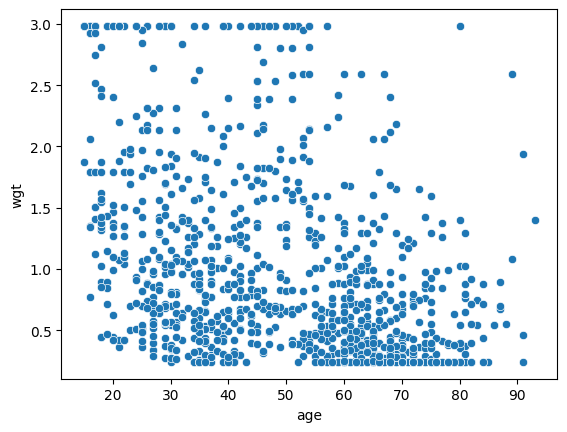

In [17]:
sns.scatterplot(data=arm21, x='age', y='wgt')

In [18]:
arm21.describe()

,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,account_fin,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
count,1.000000e+03,1000.000000,1000.000000,996.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1.594801e+08,1.000000,1.267000,48.564257,2.254000,3.1390,1.410000,1.750000,0.556000,0.535000,...,3.217000,3.753000,3.726000,3.775000,2.321000,4.123000,1.06100,1.232000,0.471000,0.135000
std,2.709244e+07,0.769410,0.442614,18.888110,0.561961,1.4141,0.492079,0.433229,0.497103,0.499023,...,1.241552,0.750036,0.793444,0.654831,1.145981,1.457393,0.23945,0.424684,0.499408,0.341895
min,1.112942e+08,0.242363,1.000000,15.000000,1.000000,1.0000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000
25%,1.364831e+08,0.404261,1.000000,32.000000,2.000000,2.0000,1.000000,1.750000,0.000000,0.000000,...,2.000000,4.000000,4.000000,4.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000
50%,1.586830e+08,0.734125,1.000000,49.000000,2.000000,3.0000,1.000000,2.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,5.000000,1.00000,1.000000,0.000000,0.000000
75%,1.817581e+08,1.350831,2.000000,64.000000,3.000000,4.0000,2.000000,2.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,1.00000,1.000000,1.000000,0.000000
max,2.107194e+08,2.983394,2.000000,93.000000,5.000000,5.0000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,6.000000,2.00000,3.000000,1.000000,1.000000


### Import 2011 data

In [19]:
arm11 = pd.read_excel('arm11.xls', sheet_name='Sheet1')
arm11.head() 

,economy,ecnmycode,wgt,female,age,educ,inc_q,q1a,account,q2,...,q16,q17,q18,q15b,q15c,q15d,q15e,q15a1a,q15a1b,q15a1c
0,Armenia,ARM,1.253175,1 male,46,secondary,3 middle 20%,no,no,NaN,...,no,NaN,no,no,no,no,no,no,no,no
1,Armenia,ARM,0.498234,2 female,35,secondary,5 richest 20%,no,no,NaN,...,no,NaN,NaN,no,no,no,no,no,no,no
2,Armenia,ARM,2.206529,2 female,23,completed primary or less,1 poorest 20%,no,no,NaN,...,no,NaN,NaN,no,no,no,no,no,no,no
3,Armenia,ARM,1.056121,2 female,46,completed primary or less,2 second 20%,no,no,NaN,...,no,NaN,NaN,no,no,no,no,no,no,no
4,Armenia,ARM,0.504857,2 female,45,secondary,5 richest 20%,no,no,NaN,...,no,NaN,NaN,no,no,no,no,no,no,no
